### joint-RPCA

In [ ]:
biom convert \
 -i jrpca_mtb_feattab.txt \
 -o jrpca_mtb_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtb_feattab.biom \
 --output-path jrpca_mtb_feattab.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_16s_feattab.txt \
 -o jrpca_16s_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_16s_feattab.biom \
 --output-path jrpca_16s_feattab.qza \
 --type FeatureTable[Frequency]


In [ ]:
qiime gemelli joint-rpca \
    --i-tables jrpca_mtb_feattab.qza jrpca_16s_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/cross_validation_error.qza


In [ ]:
qiime longitudinal volatility \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/cross_validation_error.qza \
    --p-state-column 'iteration' \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/volatility_plot.qzv

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/emperor-biplot.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt\
    --m-metadata-column 'condition'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/permanova-cond.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt\
    --m-metadata-column 'NASH_category'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/permanova-nash.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt\
    --m-metadata-column 'steatosis_grade_new'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/permanova-steatosis.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt\
    --m-metadata-column 'fibrosis_stage_new'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/permanova-fibrosis.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt\
    --m-metadata-column 'collection_timepoint'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/permanova-ZT.qzv

qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_distance_matrix.qza\
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt\
    --m-metadata-column 'cond_NASH'\
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/permanova-condNASH.qzv

In [ ]:
!qiime gemelli filter-ordination \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_biplot.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_mtb_feattab.qza \
    --o-subset-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/ordination-mtb.qza

!qiime gemelli filter-ordination \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_biplot.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_16s_feattab.qza \
    --o-subset-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/ordination-16s.qza

In [ ]:
!qiime qurro loading-plot \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/ordination-mtb.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_mtb_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_mtb_annotation_key.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/Qurro-mtb.qzv

!qiime qurro loading-plot \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/ordination-16s.qza \
    --i-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_16s_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_16s_annotation_key.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/Qurro-16s.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_table.qza

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/ordination-mtb.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_mtb_table.qza

qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/ordination-16s.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_16s_table.qza

In [ ]:
qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_table

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_mtb_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_mtb_table

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_16s_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_16s_table

In [3]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_table/Correlation.tsv', sep='\t', index_col=0)
#correlation_table = q2.Artifact.load('/mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/multiomics/jrpca/correlation_table.qza')
#correlation_table_df = correlation_table.view(pd.DataFrame)

/opt/anaconda3/envs/mmvec-qiime2-2020.11/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
correlation_table.shape

(4667, 4667)

In [5]:
correlation_table.head()

,1,2,3,4,5,6,7,8,9,10,...,cf7f7463ab3cfdd7d0a4046d06f37dc8,3bd9259f27f5ee091b992690ffd9d93f,aa5e7338afe8a35fbac4083c1d1b8721,cd79f35f96e1b7fe7b111478ced7adc3,95407e393b861f386c0afe485c8ea7b2,fa8fd133d35f1f58e08b2cfc9a88cb96,6dbeccdecaeb89a34858b202cbc46eb2,28c175fe53daa07decb4c94cca5b4f89,7c84a255717c923ef731a08905705b8d,cf4fac0cbb58da66ff59450ec524a7f4
featureid,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0


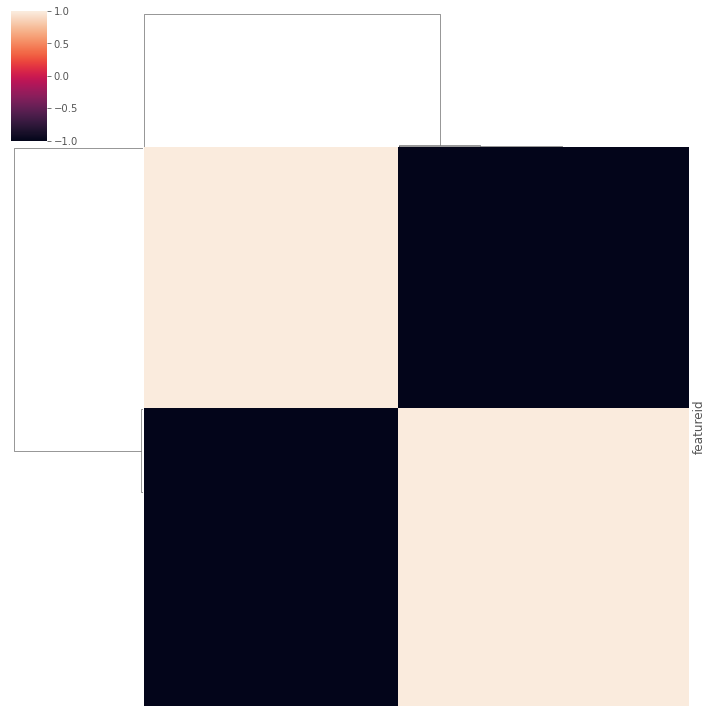

In [6]:
# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_table/Correlation_heatmap_all.png',
            dpi=300,bbox_inches='tight')

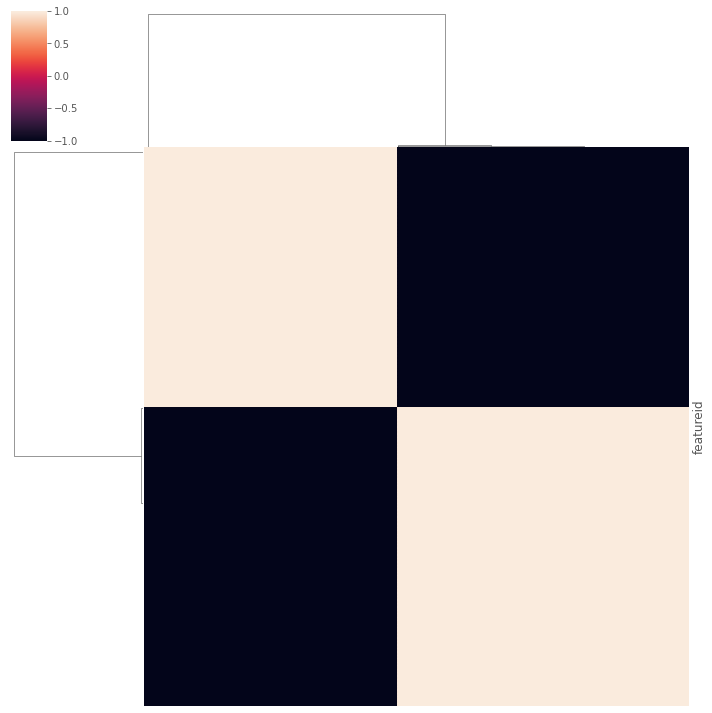

In [7]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_mtb_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_mtb_table/Correlation_heatmap_mtb.png',
            dpi=300,bbox_inches='tight')

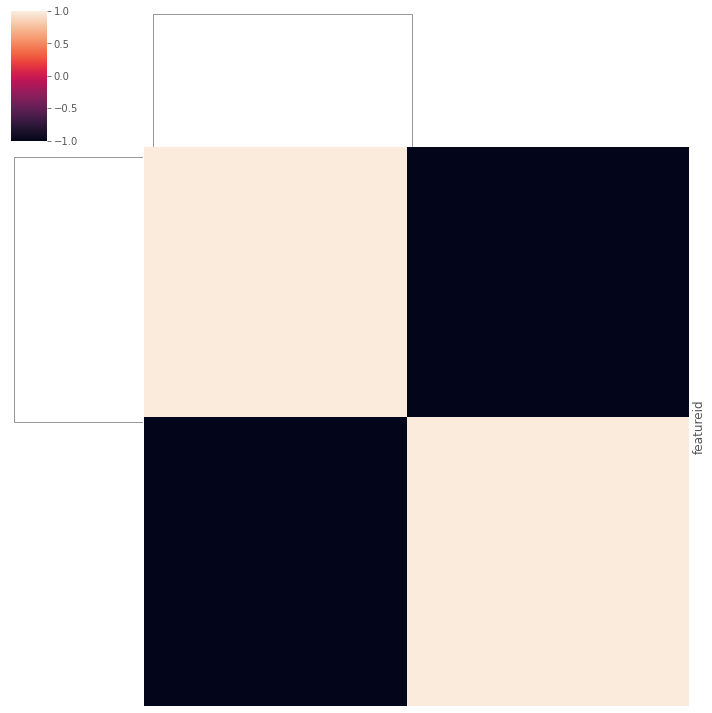

In [8]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_16s_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_all/correlation_16s_table/Correlation_heatmap_16s.png',
            dpi=300,bbox_inches='tight')

## Selecting the microbes that were different using Birdman and mtbs that are BAs

In [ ]:
biom convert \
 -i jrpca_16sbdm_feattab.txt \
 -o jrpca_16sbdm_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_16sbdm_feattab.biom \
 --output-path jrpca_16sbdm_feattab.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_mtbBA_feattab.txt \
 -o jrpca_mtbBA_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtbBA_feattab.biom \
 --output-path jrpca_mtbBA_feattab.qza \
 --type FeatureTable[Frequency]

In [ ]:
qiime gemelli joint-rpca \
    --i-tables jrpca_16sbdm_feattab.qza jrpca_mtbBA_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/cross_validation_error.qza

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/emperor-biplot.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/correlation_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/correlation_table

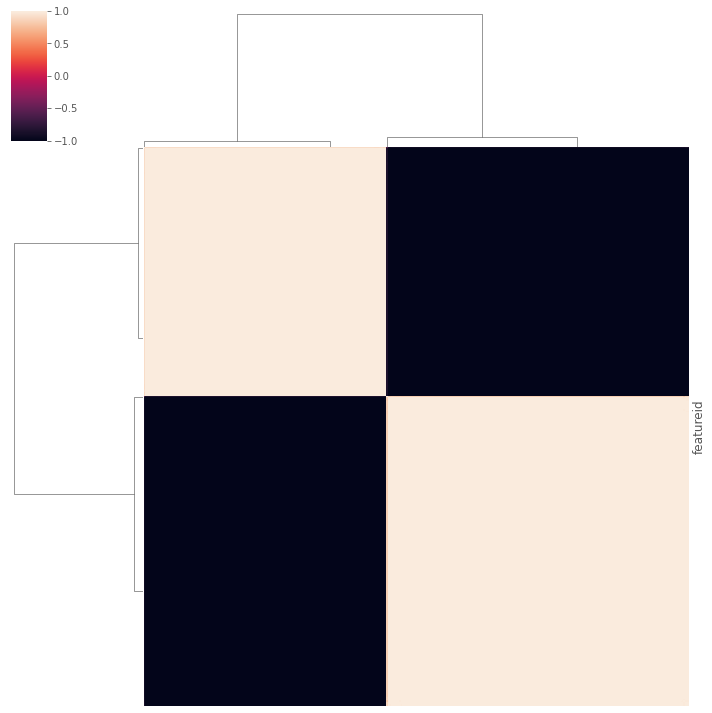

In [9]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/correlation_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA/correlation_table/Correlation_heatmap.png',
            dpi=300,bbox_inches='tight')

## Selecting the microbes that were different & shared using Birdman and mtbs that are BAs

In [ ]:
biom convert \
 -i jrpca_16sbdm_shared_feattab.txt \
 -o jrpca_16sbdm_shared_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_16sbdm_shared_feattab.biom \
 --output-path jrpca_16sbdm_shared_feattab.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_mtbBA_feattab.txt \
 -o jrpca_mtbBA_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtbBA_feattab.biom \
 --output-path jrpca_mtbBA_feattab.qza \
 --type FeatureTable[Frequency]

In [ ]:
qiime gemelli joint-rpca \
    --i-tables jrpca_16sbdm_shared_feattab.qza jrpca_mtbBA_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/cross_validation_error.qza

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/emperor-biplot.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/correlation_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/correlation_table

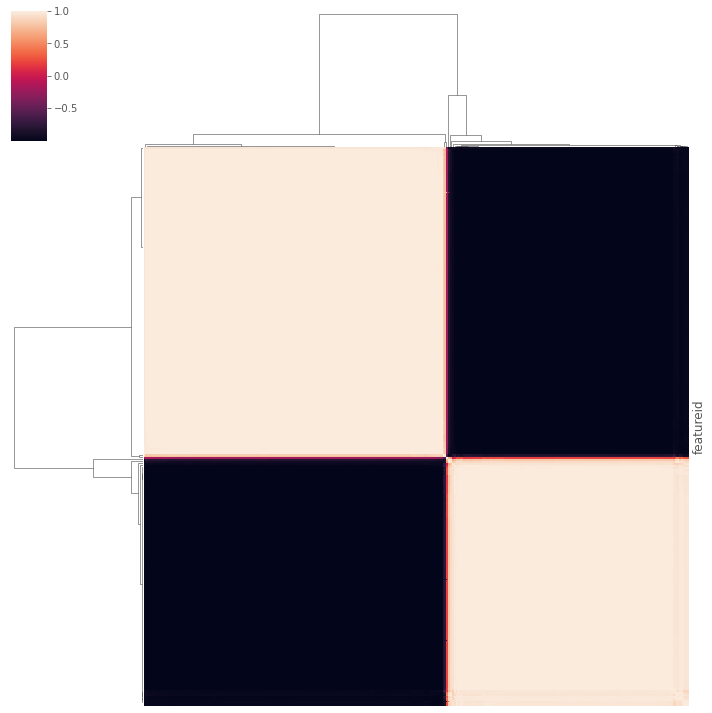

In [11]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/correlation_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdmBA_sel/correlation_table/Correlation_heatmap.png',
            dpi=300,bbox_inches='tight')

## Selecting the microbes (10) and metabolites (41) that were different & shared b/w wk8 and wk12 using Birdman (wk12 quant tables)

In [ ]:
biom convert \
 -i jrpca_16sbdm_shared_feattab_gg2.txt \
 -o jrpca_16sbdm_shared_feattab_gg2.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_16sbdm_shared_feattab_gg2.biom \
 --output-path jrpca_16sbdm_shared_feattab_gg2.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_mtbbdm_sel41_feattab.txt \
 -o jrpca_mtbbdm_sel41_feattab.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtbbdm_sel41_feattab.biom \
 --output-path jrpca_mtbbdm_sel41_feattab.qza \
 --type FeatureTable[Frequency]

In [ ]:
qiime gemelli joint-rpca \
    --i-tables jrpca_16sbdm_shared_feattab_gg2.qza jrpca_mtbbdm_sel41_feattab.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/cross_validation_error.qza

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/emperor-biplot.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/correlation_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/correlation_table

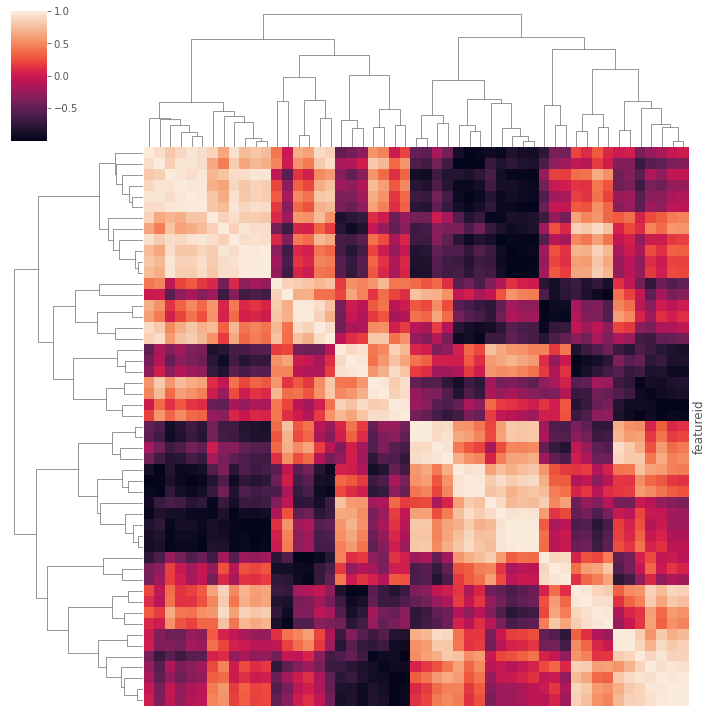

In [14]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/correlation_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_gg2/correlation_table/Correlation_heatmap.png',
            dpi=300,bbox_inches='tight')

## Selecting the microbes (10) and metabolites (41) that were different & shared b/w wk8 and wk12 using Birdman (wk8 quant tables)

In [ ]:
biom convert \
 -i jrpca_16sbdm_shared_feattab_wk8_gg2.txt \
 -o jrpca_16sbdm_shared_feattab_wk8_gg2.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_16sbdm_shared_feattab_wk8_gg2.biom \
 --output-path jrpca_16sbdm_shared_feattab_wk8_gg2.qza \
 --type FeatureTable[Frequency]

biom convert \
 -i jrpca_mtbbdm_sel41_feattab_wk8.txt \
 -o jrpca_mtbbdm_sel41_feattab_wk8.biom \
 --table-type="OTU table" \
 --to-hdf5

qiime tools import \
 --input-path jrpca_mtbbdm_sel41_feattab_wk8.biom \
 --output-path jrpca_mtbbdm_sel41_feattab_wk8.qza \
 --type FeatureTable[Frequency]

In [ ]:
qiime gemelli joint-rpca \
    --i-tables jrpca_16sbdm_shared_feattab_wk8_gg2.qza jrpca_mtbbdm_sel41_feattab_wk8.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata_wk8.txt \
    --p-train-test-column  'traintest' \
    --p-max-iterations 25 \
    --p-min-feature-frequency 5 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/joint_biplot.qza\
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/joint_distance_matrix.qza\
    --o-cross-validation-error /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/cross_validation_error.qza

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/joint_biplot.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/jrpca_metadata_wk8.txt \
    --p-number-of-features 25 \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/emperor-biplot.qzv

In [ ]:
qiime gemelli feature-correlation-table \
    --i-ordination /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/joint_biplot.qza \
    --o-correlation-table /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/correlation_table.qza

qiime tools export --input-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/correlation_table.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/correlation_table

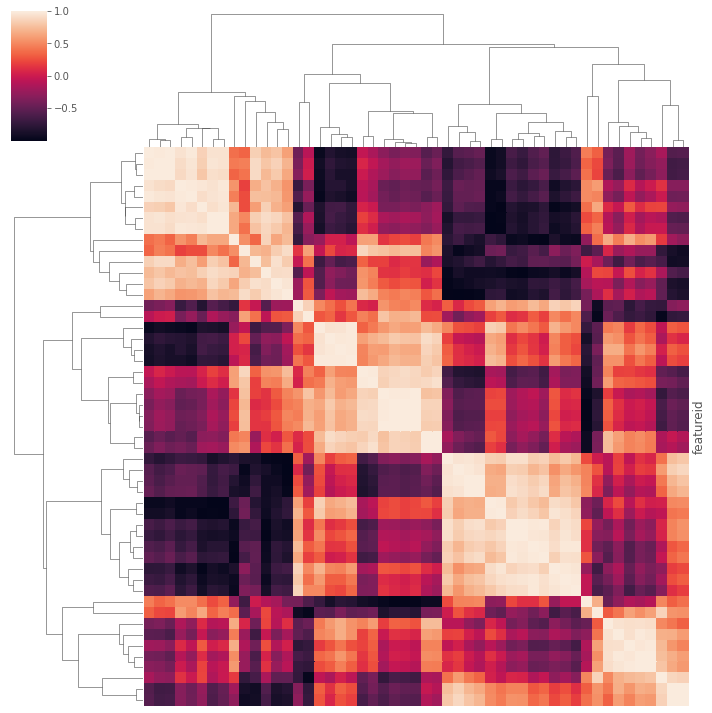

In [15]:
# import data utils
import pandas as pd
import qiime2 as q2
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# export the correlations (Note: this step can take a few minutes)
correlation_table = pd.read_table('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/correlation_table/Correlation.tsv', sep='\t', index_col=0)

# plot the correlations (Note: this step can take a few minutes)
sns.clustermap(correlation_table,yticklabels=False,
               xticklabels=False)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/NASH_KF/multiomics_16smtb/result_bdm_sel41mtb_sel10micro_wk8_gg2/correlation_table/Correlation_heatmap.png',
            dpi=300,bbox_inches='tight')